### Sources
Inflation Dataset 1913-2022 (Kaggle): https://www.kaggle.com/datasets/neelgajare/usa-cpi-inflation-from-19132022<br>
Interest Rate Dataset 1954-2017 (Federal Reserve): https://www.kaggle.com/datasets/federalreserve/interest-rates<br>
USA YoY Inflation + Federal Reserve Interest Rates 1954-2017 (Kaggle): https://www.kaggle.com/datasets/pumpkinsmith/interest-rate-yoy-inflation-data-1954-to-2017<br>
USA Historical Income Tax Rate Data 1913-2020 (Kaggle): https://www.kaggle.com/datasets/frtgnn/historical-income-tax-rates-brackets<br>
USA GDP Data 1947-2025 (Federal Reserve): https://fred.stlouisfed.org/series/GDP<br>
USA CPI Data 1947-2025 (Federal Reserve): https://fred.stlouisfed.org/series/CPIAUCSL<br>
USA Federal Reserve Interest Rates 1954-2024 (Federal Reserve): https://fred.stlouisfed.org/series/FEDFUNDS<br>

### Imports

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import dataCleaning.total_cpi_per_year_usa_cleaning
import dataCleaning.interest_rate_data_usa_cleaning
import dataCleaning.gdp_growth_data_usa_official_cleaning

### Interest rate data from kaggle 1954 to 2017

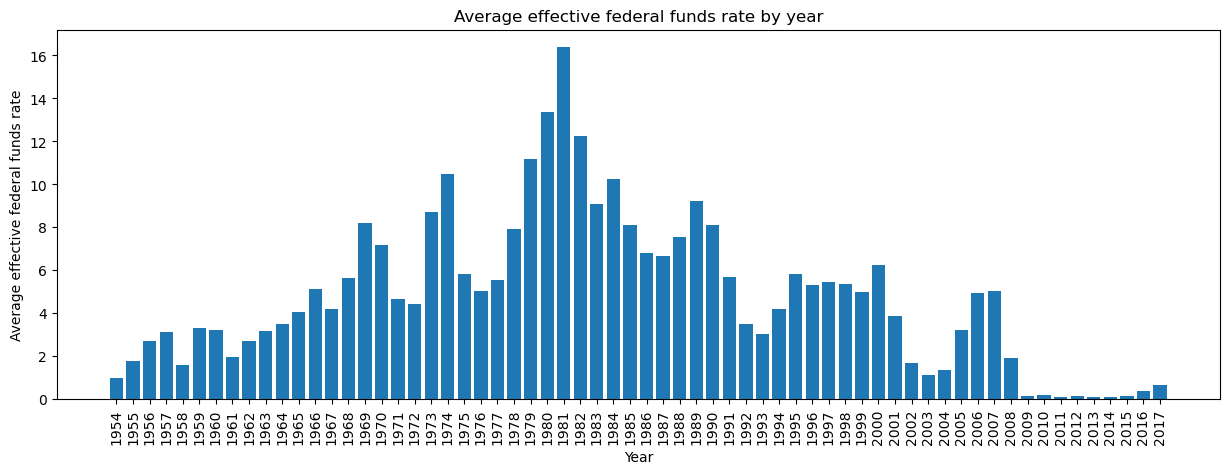

In [23]:
interest_rate_dictionary_average = dataCleaning.interest_rate_data_usa_cleaning.get_cleaned_interest_rate_data()

names = list(interest_rate_dictionary_average.keys())
values = list(interest_rate_dictionary_average.values())

fig, ax = plt.subplots()

plt.title("Average effective federal funds rate by year")
plt.ylabel("Average effective federal funds rate")
plt.xlabel("Year")
ax.bar(names, values)
ax.tick_params(axis="x", labelrotation = 90)
fig.set_figwidth(15)
plt.show()

### Inflation data from kaggle 1954 to 2017

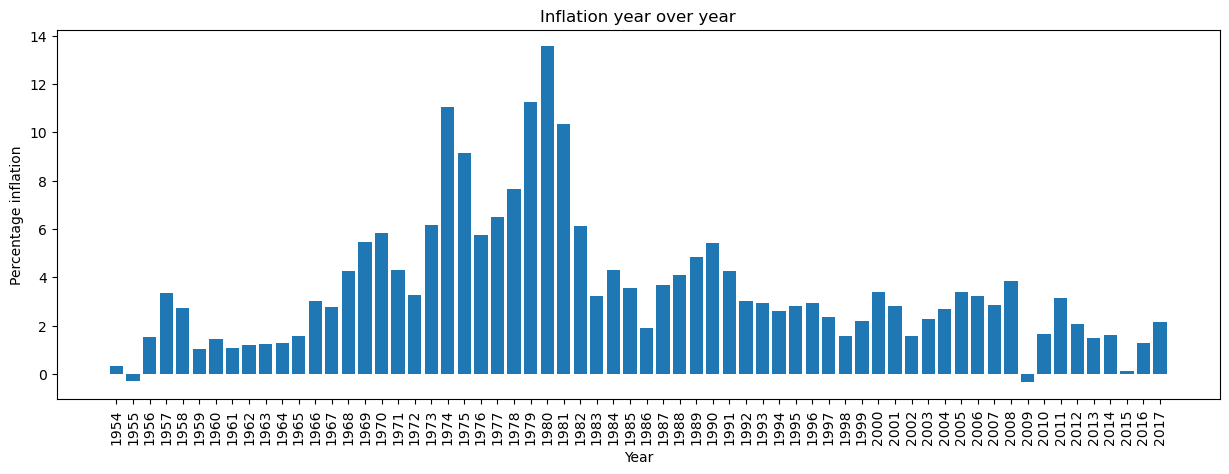

In [24]:
cpi_dictionary_inflation_year_over_year_1954_to_2017 = dataCleaning.total_cpi_per_year_usa_cleaning.get_cleaned_cpi_data()

names = list(cpi_dictionary_inflation_year_over_year_1954_to_2017.keys())
values = list(cpi_dictionary_inflation_year_over_year_1954_to_2017.values())

fig, ax = plt.subplots()

plt.title("Inflation year over year")
plt.ylabel("Percentage inflation")
plt.xlabel("Year")
ax.bar(names, values)
ax.tick_params(axis="x", labelrotation = 90)
fig.set_figwidth(15)
plt.show()

### Combined inflation and interest rate data from kaggle 1954 to 2017, linear regression model used

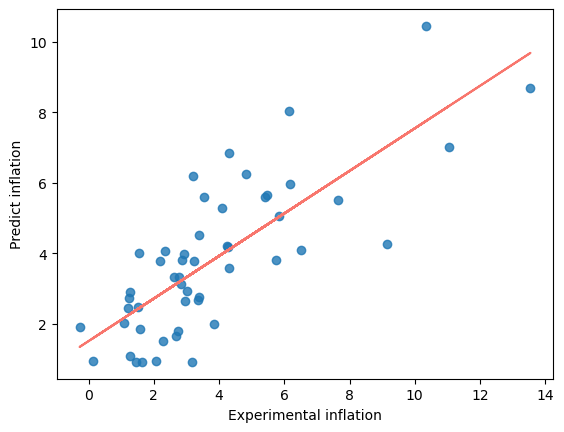

In [25]:
# cleaned cpi and interest rate data (dictionaries) from 1954 to 2017
cleaned_interest_rate_data_1954_to_2017 = dataCleaning.interest_rate_data_usa_cleaning.get_cleaned_interest_rate_data()
cleaned_inflation_year_over_year_data_1954_to_2017 = dataCleaning.total_cpi_per_year_usa_cleaning.get_cleaned_cpi_data()

# create a dictionary for the combined clean interest rate and cpi data from 1954 to 2017
combined_cleaned_interest_cpi_gdp_data_1954_to_2017 = {}

# populate combined clean interest and cpi data dictionary from 1954 to 2017
for key in cleaned_inflation_year_over_year_data_1954_to_2017:
    combined_cleaned_interest_cpi_gdp_data_1954_to_2017[key] = [cleaned_interest_rate_data_1954_to_2017[key], cleaned_inflation_year_over_year_data_1954_to_2017[key]]

df = pd.DataFrame.from_dict(data = combined_cleaned_interest_cpi_gdp_data_1954_to_2017, orient="index", columns=["interest_rate", "inflation"])
df.reset_index(inplace=True)
df.rename(columns={"index":"year"}, inplace=True)

# assign attributes to X and classification labels to y
y = df["inflation"]
X = df.drop(["inflation", "year"], axis=1)

# create train_testsplit of 80-20, 80% training, 20% test for the X and y variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# create linear regression model and fit it to the training data (X_train and y_train)
lr = LinearRegression()
lr.fit(X_train, y_train)

# make predictions for the X_train and X_test sets using the fitted linear regression model
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

# compute mean squared error and r-squared for the training set
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

# compute mean squared error and r-squared for the test set
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

# place the results of the training and test set mean squared error and r-squared into a pandas dataframe
lr_results = pd.DataFrame(["Linear Regression", lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]

# create linear regression line
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

# construct scatter plot to show the linear regression line along with the experimental inflation vs predicted inflation
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.8)
plt.ylabel("Predict inflation")
plt.xlabel("Experimental inflation")
plt.plot(y_train, p(y_train), "#F8766D")
plt.show()

In [26]:
print(y_lr_train_pred)

[ 1.52078366  3.32162169  8.68410629  4.27207754  3.13758375  7.0126318
  3.96404588  0.91253097  3.99626472  8.04119393  0.92327058  1.65063536
  6.25939432  4.51323069  3.5906002   2.00553079  0.93791551  3.77170915
  2.92327963  4.19201859  5.97284188  3.3323613   1.90594528  5.60574235
  1.78146339 10.45467813  1.98942137  3.81564394  6.18324069  2.72215595
  5.06680898  4.05874975  5.60476602  0.94230899  1.09168726  0.91985343
  2.74265885  4.17395652  3.80051084  2.45854724  5.29380537  3.768292
  6.85007309  2.90863471  1.83662595  5.66627472  4.10414902  2.63086923
  2.67919749  5.50615683  2.4468313 ]


In [27]:
print(y_lr_test_pred)

[4.2794     4.84664689 3.85420891 0.95402493 0.96281189 7.41780815
 4.76024182 2.79635692 3.24595622 1.24399451 1.44999984 3.45586686
 2.74412334]


In [28]:
print("LR MSE (Train): ", lr_train_mse)
print("LR R2 (Train): ", lr_train_r2)
print("LR MSE (Test): ", lr_test_mse)
print("LR R2 (Test): ", lr_test_r2)

LR MSE (Train):  2.927423030620769
LR R2 (Train):  0.6039367941471265
LR MSE (Test):  3.029353642346849
LR R2 (Test):  0.5947019253984694


In [29]:
print(lr_results)

              Method Training MSE Training R2  Test MSE   Test R2
0  Linear Regression     2.927423    0.603937  3.029354  0.594702


### Combined inflation, interest rate (kaggle), and gdp (official) data 1954 to 2017, linear regression model used

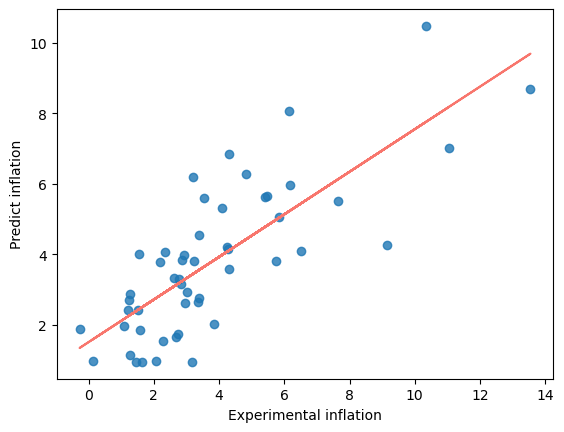

In [30]:
# cleaned cpi and interest rate data (dictionaries) from 1954 to 2017

cleaned_interest_rate_data_1954_to_2017 = dataCleaning.interest_rate_data_usa_cleaning.get_cleaned_interest_rate_data()
cleaned_inflation_year_over_year_data_1954_to_2017 = dataCleaning.total_cpi_per_year_usa_cleaning.get_cleaned_cpi_data()
cleaned_gdp_data_1954_to_2017 = dataCleaning.gdp_growth_data_usa_official_cleaning.get_cleaned_gdp_data()

# create a dictionary for the combined clean interest rate and cpi data from 1954 to 2017
combined_cleaned_interest_cpi_gdp_data_1954_to_2017 = {}

# populate combined clean interest and cpi data dictionary from 1954 to 2017
for key in cleaned_inflation_year_over_year_data_1954_to_2017:
    combined_cleaned_interest_cpi_gdp_data_1954_to_2017[key] = [cleaned_interest_rate_data_1954_to_2017[key], cleaned_inflation_year_over_year_data_1954_to_2017[key], cleaned_gdp_data_1954_to_2017[key]]

df = pd.DataFrame.from_dict(data = combined_cleaned_interest_cpi_gdp_data_1954_to_2017, orient="index", columns=["interest_rate", "inflation", "gdp"])
df.reset_index(inplace=True)
df.rename(columns={"index":"year"}, inplace=True)

# assign attributes to X and classification labels to y
y = df["inflation"]
X = df.drop(["inflation", "year"], axis=1)

# create train_testsplit of 80-20, 80% training, 20% test for the X and y variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# create linear regression model and fit it to the training data (X_train and y_train)
lr = LinearRegression()
lr.fit(X_train, y_train)

# make predictions for the X_train and X_test sets using the fitted linear regression model
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

# compute mean squared error and r-squared for the training set
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

# compute mean squared error and r-squared for the test set
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

# place the results of the training and test set mean squared error and r-squared into a pandas dataframe
lr_results = pd.DataFrame(["Linear Regression", lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]

# create linear regression line
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

# construct scatter plot to show the linear regression line along with the experimental inflation vs predicted inflation
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.8)
plt.ylabel("Predict inflation")
plt.xlabel("Experimental inflation")
plt.plot(y_train, p(y_train), "#F8766D")
plt.show()

In [31]:
print(y_lr_train_pred)

[ 1.52871334  3.32193298  8.69531382  4.25406092  3.15073794  7.00911782
  3.97119962  0.94298319  4.00775815  8.05090743  0.95072253  1.66247944
  6.26896053  4.53256748  3.56664409  1.9703125   0.97139626  3.78435642
  2.91817225  4.19237386  5.96309852  3.305701    1.86960362  5.60623118
  1.74467077 10.47710561  2.01386642  3.7959069   6.18394461  2.69119998
  5.05059617  4.06854639  5.6120801   0.96723005  1.12815913  0.94189937
  2.76397285  4.15226956  3.83368477  2.42534871  5.29635099  3.79851852
  6.85614602  2.87890323  1.84407692  5.65312844  4.08687706  2.62557425
  2.64731773  5.49773915  2.41421832]


In [32]:
print(y_lr_test_pred)

[4.28646754 4.8439681  3.83022627 0.97154172 0.98277807 7.42107599
 4.75824626 2.76532251 3.2183253  1.28469975 1.41100076 3.43164942
 2.7128885 ]


In [33]:
print("LR MSE (Train): ", lr_train_mse)
print("LR R2 (Train): ", lr_train_r2)
print("LR MSE (Test): ", lr_test_mse)
print("LR R2 (Test): ", lr_test_r2)

LR MSE (Train):  2.9269752515262786
LR R2 (Train):  0.6039973760383744
LR MSE (Test):  2.991599136214191
LR R2 (Test):  0.5997531113772856


In [34]:
print(lr_results)

              Method Training MSE Training R2  Test MSE   Test R2
0  Linear Regression     2.926975    0.603997  2.991599  0.599753


### Combined inflation, interest rate (kaggle), and gdp (official) data 1954 to 2017, logistic regression model used (created categories for inflation ("low", "moderate", "high"))

In [35]:
# cleaned cpi and interest rate data (dictionaries) from 1954 to 2017
cleaned_interest_rate_data_1954_to_2017 = dataCleaning.interest_rate_data_usa_cleaning.get_cleaned_interest_rate_data()
cleaned_inflation_year_over_year_data_1954_to_2017 = dataCleaning.total_cpi_per_year_usa_cleaning.get_cleaned_cpi_data()
cleaned_gdp_data_1954_to_2017 = dataCleaning.gdp_growth_data_usa_official_cleaning.get_cleaned_gdp_data()

# create a dictionary for the combined clean interest rate and cpi data from 1954 to 2017
combined_cleaned_interest_inflation_data_1954_to_2017 = {}

cleaned_inflation_year_over_year_data_1954_to_2017_categories = {}

# assign category to cleaned inflation year over year data
for key in cleaned_inflation_year_over_year_data_1954_to_2017:
    if cleaned_inflation_year_over_year_data_1954_to_2017.get(key) < 2:
        inflation_category = "low"
        cleaned_inflation_year_over_year_data_1954_to_2017_categories[key] = inflation_category
    elif (2 <= cleaned_inflation_year_over_year_data_1954_to_2017.get(key) <= 4):
        inflation_category = "moderate"
        cleaned_inflation_year_over_year_data_1954_to_2017_categories[key] = inflation_category
    else:
        inflation_category = "high"
        cleaned_inflation_year_over_year_data_1954_to_2017_categories[key] = inflation_category

# print(cleaned_inflation_year_over_year_data_1954_to_2017_categories)

# populate combined clean interest and cpi data dictionary from 1954 to 2017
for key in cleaned_inflation_year_over_year_data_1954_to_2017:
    combined_cleaned_interest_inflation_data_1954_to_2017[key] = [cleaned_interest_rate_data_1954_to_2017[key], cleaned_gdp_data_1954_to_2017[key], cleaned_inflation_year_over_year_data_1954_to_2017[key], cleaned_inflation_year_over_year_data_1954_to_2017_categories[key]]

df = pd.DataFrame.from_dict(data = combined_cleaned_interest_inflation_data_1954_to_2017, orient="index", columns=["interest_rate", "gdp", "inflation", "inflation_category"])
df.reset_index(inplace=True)
df.rename(columns={"index":"year"}, inplace=True)
df["inflation_category_encoded"] = df["inflation_category"].map({"low":0, "moderate":1, "high":2})

X = df.drop(["year", "inflation_category", "inflation", "inflation_category_encoded"], axis=1)
y = df["inflation_category_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight="balanced",max_iter=1000)
)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

classification_label_count_dictionary = {}
classification_label_count_dictionary['moderate'] = df['inflation_category'].value_counts().get('moderate')
classification_label_count_dictionary['low'] = df['inflation_category'].value_counts().get('low')
classification_label_count_dictionary['high'] = df['inflation_category'].value_counts().get('high')

highest_count_classification_label = -1 * math.inf
total_count_classification_labels = df['inflation_category'].value_counts().sum()

for key in classification_label_count_dictionary:
  if classification_label_count_dictionary[key] > highest_count_classification_label:
    highest_count_classification_label = classification_label_count_dictionary[key]

In [36]:
print(y_train.value_counts(normalize=True))

print("Base accuracy if classifying via most frequently occuring class: ", highest_count_classification_label / total_count_classification_labels)
print("Logistic regression model accuracy: ", accuracy_score(y_test, y_pred_test))
print("Logistic regression model f1 score weighted: ", f1_score(y_test, y_pred_test, average="weighted"))

print(df)

inflation_category_encoded
1    0.386364
2    0.340909
0    0.272727
Name: proportion, dtype: float64
Base accuracy if classifying via most frequently occuring class:  0.40625
Logistic regression model accuracy:  0.75
Logistic regression model f1 score weighted:  0.7547619047619047
    year  interest_rate          gdp  inflation inflation_category  \
0   1954       1.006667    390.54900   0.311333                low   
1   1955       1.785000    425.47950  -0.279330                low   
2   1956       2.728333    449.35250   1.525054                low   
3   1957       3.105000    474.03950   3.341508           moderate   
4   1958       1.572500    481.22850   2.729160           moderate   
..   ...            ...          ...        ...                ...   
59  2013       0.107500  16880.68325   1.464833                low   
60  2014       0.089167  17608.13825   1.622223                low   
61  2015       0.132500  18295.01900   0.118627                low   
62  2016       0.

### Combined inflation, interest rate (kaggle), gdp (official) data 1954 to 2017, and recession (yes or no) (official) data 1955 to 2018. logistic regression model used (created categories for inflation ("low", "moderate", "high"))

In [37]:
# cleaned cpi and interest rate data (dictionaries) from 1954 to 2017
cleaned_interest_rate_data_1954_to_2017 = dataCleaning.interest_rate_data_usa_cleaning.get_cleaned_interest_rate_data()
cleaned_inflation_year_over_year_data_1954_to_2017 = dataCleaning.total_cpi_per_year_usa_cleaning.get_clean_cpi_data_next_year_prediction()
cleaned_gdp_data_1954_to_2017 = dataCleaning.gdp_growth_data_usa_official_cleaning.get_cleaned_gdp_data()

# create a dictionary for the combined clean interest rate and cpi data from 1954 to 2017
combined_cleaned_interest_inflation_data_1954_to_2017 = {}

cleaned_inflation_year_over_year_data_1954_to_2017_categories = {}

# assign category to cleaned inflation year over year data
for key in cleaned_inflation_year_over_year_data_1954_to_2017:
    if cleaned_inflation_year_over_year_data_1954_to_2017.get(key) < 2:
        inflation_category = "low"
        cleaned_inflation_year_over_year_data_1954_to_2017_categories[key] = inflation_category
    elif (2 <= cleaned_inflation_year_over_year_data_1954_to_2017.get(key) <= 4):
        inflation_category = "moderate"
        cleaned_inflation_year_over_year_data_1954_to_2017_categories[key] = inflation_category
    else:
        inflation_category = "high"
        cleaned_inflation_year_over_year_data_1954_to_2017_categories[key] = inflation_category

# print(cleaned_inflation_year_over_year_data_1954_to_2017_categories)

# populate combined clean interest and cpi data dictionary from 1954 to 2017
for key in cleaned_inflation_year_over_year_data_1954_to_2017:
    combined_cleaned_interest_inflation_data_1954_to_2017[key] = [cleaned_interest_rate_data_1954_to_2017[key], cleaned_gdp_data_1954_to_2017[key], cleaned_inflation_year_over_year_data_1954_to_2017[key], cleaned_inflation_year_over_year_data_1954_to_2017_categories[key]]

df = pd.DataFrame.from_dict(data = combined_cleaned_interest_inflation_data_1954_to_2017, orient="index", columns=["interest_rate", "gdp", "inflation", "inflation_category"])
df.reset_index(inplace=True)
df.rename(columns={"index":"year"}, inplace=True)
df["inflation_category_encoded"] = df["inflation_category"].map({"low":0, "moderate":1, "high":2})

X = df.drop(["year", "inflation_category", "inflation", "inflation_category_encoded"], axis=1)
y = df["inflation_category_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight="balanced",max_iter=1000)
)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

classification_label_count_dictionary = {}
classification_label_count_dictionary['moderate'] = df['inflation_category'].value_counts().get('moderate')
classification_label_count_dictionary['low'] = df['inflation_category'].value_counts().get('low')
classification_label_count_dictionary['high'] = df['inflation_category'].value_counts().get('high')

highest_count_classification_label = -1 * math.inf
total_count_classification_labels = df['inflation_category'].value_counts().sum()

for key in classification_label_count_dictionary:
  if classification_label_count_dictionary[key] > highest_count_classification_label:
    highest_count_classification_label = classification_label_count_dictionary[key]

In [38]:
print(y_train.value_counts(normalize=True))

print(classification_label_count_dictionary['low'])
print(classification_label_count_dictionary['moderate'])
print(classification_label_count_dictionary['high'])

print("Base accuracy if classifying via most frequently occuring class: ", highest_count_classification_label / total_count_classification_labels)
print("Logistic regression model accuracy: ", accuracy_score(y_test, y_pred_test))
print("Logistic regression model f1 score weighted: ", f1_score(y_test, y_pred_test, average="weighted"))

print(df)

inflation_category_encoded
1    0.409091
0    0.295455
2    0.295455
Name: proportion, dtype: float64
18
27
19
Base accuracy if classifying via most frequently occuring class:  0.421875
Logistic regression model accuracy:  0.7
Logistic regression model f1 score weighted:  0.6809523809523809
    year  interest_rate          gdp  inflation inflation_category  \
0   1954       1.006667    390.54900  -0.279330                low   
1   1955       1.785000    425.47950   1.525054                low   
2   1956       2.728333    449.35250   3.341508           moderate   
3   1957       3.105000    474.03950   2.729160           moderate   
4   1958       1.572500    481.22850   1.010684                low   
..   ...            ...          ...        ...                ...   
59  2013       0.107500  16880.68325   1.622223                low   
60  2014       0.089167  17608.13825   0.118627                low   
61  2015       0.132500  18295.01900   1.261583                low   
62  2016

### Learning journey

1. Looked for inflation and interest rate datasets on kaggle
2. Found 2 datasets (but they were unclean)
3. Cleaned the 2 datasets
4. Merged the 2 datasets (removing redundant features)
5. Uploaded the newly created cleaned and integrated dataset to Kaggle in order to give back to the community
6. Use the cleaned dataset to create a pandas dataframe and created a linear regression model
7. Split the data into training and test data for both X and y
8. fit the model the X and y training data
9. Made predictions with it, getting an MSE of 2.99, and an r^2 of 0.599
10. Decided to try and use a different model and see if results could be improved, went with logistic regression. As a result, I needed to create a multi-way split for my continuous class attribute (inflation), I decided on low, moderate, and high inflation categories, denoted by inflation < 2%, 2% <= inflation < 4%, and inflation >= 4% respectively.
11. Trained that model, and made predictions, getting an initial accuracy of 0.615, and a f1-score weighted of 0.69.
12. Realized that the data was not balanced, of the three classes (low, moderate, and high inflation), the frequency was 0.25, 0.35, and 0.45 respectively.
13. Added argument of class_weights="balanced" to model
14. Boosted accuracy from 0.615 to 0.692, and f1-score weighted from 0.69 to 0.742
15. Realized my predictions were being made within year, resulting in higher accuracy then should be expected (still useful since you could make predictions based on first month data)
16. Added functionality to clean cpi module to return next year inflation % data in order to see model accuracy when predicting next year inflation (significantly more useful)
17. As expected, the model performed worse, but not significantly. The accuracy stayed consistent at 0.692, but the f1-score weighted went from 0.742 to 0.658, a ~8.4% drop.
18. Even with the drop, the accuracy compared to baseline (selecting the most frequent class) offers signifcant gains in overall model effectiveness.
19. This means that consumers can use the moderate and high inflation predictions to buy non-perishable goods in the current year in order to minimize costs in the moderate to high inflation predicted years
20. Found out that a training split of 80-20 was suboptimal, tried 70-30 and found it was more optimal. This boosted f1-score and accuracy. For the first attempt (predicting the same year), accuracy went from 0.692 to 0.75 (a 7.91% improvement), and f1-score went from 0.742 to 0.754 (a 1.12% improvement). For the second attempt (predicting the following year, which is actually useful), accuracy went from 0.692 to 0.7 (a 1.15% improvement), and f1-score went from 0.658 to 0.68 (a 3.34% improvement). Both accuracy and f1-score went up across the board, further improving model performance and improving the desired outcomes (as outlined in point 19).